In [1]:
# Analytics Industry Salaries 2022#

In [2]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)#
import numpy as np  # linear algebra#
import matplotlib.pyplot as plt #plotting graphs#
import seaborn as sns # data visualization #
from wordcloud import WordCloud, STOPWORDS  
#data visualization technique used for representing text data in which the size of each word indicates its frequency or importance#
import squarify  # it is basically a colours of treemap #
import plotly.express as px  
from IPython.display import Image  #converting the GenomeDiagram to a PNG image#

In [5]:
df = pd.read_csv("Salary Dataset.csv") # to read the data #

In [6]:
df

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"
...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo"
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr"
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr"
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr"


In [7]:
def printShapeAndData(panda):  
    print(panda.shape)
    display(panda.head(10))
df= pd.read_csv('Salary Dataset.csv')

printShapeAndData(df)

(4344, 5)


,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"
5,Infosys,Data Scientist,30.0,Bangalore,"₹9,08,764/yr"
6,Capgemini,Data Scientist,28.0,Bangalore,"₹9,26,124/yr"
7,Cognizant Technology Solutions,Data Scientist,26.0,Bangalore,"₹7,36,708/yr"
8,Anheuser-Busch InBev,Data Scientist,25.0,Bangalore,"₹16,46,721/yr"
9,Fractal,Data Scientist,22.0,Bangalore,"₹13,92,960/yr"


In [8]:
# checking for null values #

print('Null Values -', df.isnull().values.any())
df.isnull().sum()

Null Values - True


Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

In [9]:
# checking if there is any Duplicate value present in the dataset #

df.duplicated().sum()

0

In [10]:
# checking unique values for features #

df["Job Title"].unique()

array(['Data Scientist', 'Data Science Associate',
       'Data Science Consultant', 'Data Science', 'Senior Data Scientist',
       'Junior Data Scientist', 'Lead Data Scientist',
       'Data Science Manager', 'Data Scientist - Trainee',
       'Data Science Lead', 'Data Analyst', 'Data Engineer',
       'Machine Learning Engineer', 'Machine Learning Software Engineer',
       'Software Engineer - Machine Learning',
       'Machine Learning Engineer/Data Scientist',
       'Machine Learning Consultant', 'Machine Learning Data Associate',
       'Machine Learning Data Associate I', 'Machine Learning Associate',
       'Machine Learning Data Associate II',
       'Associate Machine Learning Engineer',
       'Machine Learning Data Analyst',
       'Senior Machine Learning Engineer', 'Machine Learning Scientist',
       'Machine Learning Developer'], dtype=object)

In [11]:
# checking how many companies are there for analysis#

df["Company Name"].nunique() # we use nunique for getting a count #


2529

In [12]:
df["Company Name"]

0                        Mu Sigma
1                             IBM
2       Tata Consultancy Services
3                Impact Analytics
4                       Accenture
                  ...            
4339                      TaiyōAI
4340      Decimal Point Analytics
4341                       MyWays
4342    Market Pulse Technologies
4343                      vPhrase
Name: Company Name, Length: 4344, dtype: object

In [13]:
df["Location"].unique()

array(['Bangalore', 'Pune', 'Hyderabad', 'New Delhi', 'Mumbai'],
      dtype=object)

In [14]:
df["Location"].nunique()

5

In [15]:
# data cleaning #

df = df[df['Company Name'].notna()]  # we use notna() function to remove the null values#
df = df[df['Salaries Reported'].notna()]


In [16]:
print('Null Values -', df.isnull().values.any())
df.isnull().sum()

Null Values - False


Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

In [17]:
salaries_cleaned = df.loc[df['Salary'].str.contains("AFN" , case = False)]

In [18]:
salaries_cleaned 

,Company Name,Job Title,Salaries Reported,Location,Salary
2278,md,Data Analyst,1.0,Pune,"AFN 1,56,179/yr"


In [19]:
df['currency'] = df['Salary'].str.slice(0,1)

In [20]:
df['currency'].unique()

array(['₹', '$', '£', 'A'], dtype=object)

In [21]:
df.at[2278, "currency"] = "AFN"

In [22]:
 df.loc[df['Salary'].str.contains("AFN" , case = False)]

,Company Name,Job Title,Salaries Reported,Location,Salary,currency
2278,md,Data Analyst,1.0,Pune,"AFN 1,56,179/yr",AFN


In [23]:
# we will make new column for duration as we have distinct duration for a salary#

df["duration"] = df['Salary'].str.split("/", 1, expand = True)[1]

In [24]:
df["duration"].unique()

array(['yr', 'mo', 'hr'], dtype=object)

In [25]:
# now we will make column for salary which is in proper format#

df["salary_amt"] = df['Salary'].str.split("/", 1, expand = True)[0].str.slice(1)

In [26]:
df["salary_amt"] = df["salary_amt"].str.replace(',','')

In [27]:
df["salary_amt"]

0        648573
1       1191950
2        836874
3        669578
4        944110
         ...   
4339       5180
4340     751286
4341     410952
4342    1612324
4343     939843
Name: salary_amt, Length: 4339, dtype: object

In [28]:
df.at[2278,'salary_amt'] = 156179

In [29]:
df[df['salary_amt'].isin([156179])]

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,duration,salary_amt
2278,md,Data Analyst,1.0,Pune,"AFN 1,56,179/yr",AFN,yr,156179


In [30]:
df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,duration,salary_amt
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,yr,648573
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,yr,1191950
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,yr,836874
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,yr,669578
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,yr,944110


In [31]:
df['salary_amt'] = df['salary_amt'].astype(float)
df['Salaries Reported'] = df['Salaries Reported'].astype(int)


In [32]:
df

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,duration,salary_amt
0,Mu Sigma,Data Scientist,105,Bangalore,"₹6,48,573/yr",₹,yr,648573.0
1,IBM,Data Scientist,95,Bangalore,"₹11,91,950/yr",₹,yr,1191950.0
2,Tata Consultancy Services,Data Scientist,66,Bangalore,"₹8,36,874/yr",₹,yr,836874.0
3,Impact Analytics,Data Scientist,40,Bangalore,"₹6,69,578/yr",₹,yr,669578.0
4,Accenture,Data Scientist,32,Bangalore,"₹9,44,110/yr",₹,yr,944110.0
...,...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1,Mumbai,"₹5,180/mo",₹,mo,5180.0
4340,Decimal Point Analytics,Machine Learning Developer,1,Mumbai,"₹7,51,286/yr",₹,yr,751286.0
4341,MyWays,Machine Learning Developer,1,Mumbai,"₹4,10,952/yr",₹,yr,410952.0
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1,Mumbai,"₹16,12,324/yr",₹,yr,1612324.0


In [33]:
df.describe()

,Salaries Reported,salary_amt
count,4339.000000,4.339000e+03
mean,2.777138,7.680710e+05
std,5.148095,7.690025e+05
min,1.000000,2.600000e+01
25%,1.000000,1.087225e+05
50%,1.000000,6.199950e+05
75%,3.000000,1.098632e+06
max,105.000000,9.568943e+06


In [34]:
df['salary_amt'].loc[df['duration'] == 'mo'] = df['salary_amt'] * 12 # we use loc for considering a cell value#
df['salary_amt'].loc[df['duration'] == 'hr'] = df['salary_amt'] * 480


C:\Users\Shubham\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [35]:
df['salary_amt'].loc[df['currency'] == '$'] = df['salary_amt'] * 75.94
df['salary_amt'].loc[df['currency'] == '£'] = df['salary_amt'] * 99.20
df['salary_amt'].loc[df['currency'] == 'AFN'] = df['salary_amt'] * 0.86

In [36]:
# As we no longer need salary,currency,and duration.. we will remove them #

df.drop(['Salary','currency','duration'], axis = 1, inplace = True )

In [37]:
df = df.rename({'salary_amt' : 'Salary'}, axis = 1)

In [38]:
df

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,IBM,Data Scientist,95,Bangalore,1191950.0
2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0
3,Impact Analytics,Data Scientist,40,Bangalore,669578.0
4,Accenture,Data Scientist,32,Bangalore,944110.0
...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1,Mumbai,62160.0
4340,Decimal Point Analytics,Machine Learning Developer,1,Mumbai,751286.0
4341,MyWays,Machine Learning Developer,1,Mumbai,410952.0
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1,Mumbai,1612324.0


In [39]:
df['Location'].value_counts()

Bangalore    1584
Pune          814
Hyderabad     669
New Delhi     655
Mumbai        617
Name: Location, dtype: int64

In [40]:
df['Job Title'].value_counts()

Data Scientist                          1844
Data Analyst                             988
Data Engineer                            804
Machine Learning Engineer                568
Data Science                              43
Senior Data Scientist                     39
Junior Data Scientist                     18
Senior Machine Learning Engineer           9
Lead Data Scientist                        6
Machine Learning Scientist                 2
Machine Learning Consultant                2
Software Engineer - Machine Learning       2
Machine Learning Developer                 2
Data Science Associate                     1
Machine Learning Software Engineer         1
Data Science Consultant                    1
Data Science Lead                          1
Machine Learning Data Associate            1
Machine Learning Data Associate I          1
Machine Learning Associate                 1
Machine Learning Data Associate II         1
Associate Machine Learning Engineer        1
Machine Le

In [41]:
df['Salaries Reported'].value_counts()[:7]

1    2501
2     735
3     382
4     180
5     124
6      76
7      66
Name: Salaries Reported, dtype: int64

In [104]:
print("Maximun Salary = ₹", round(df["Salary"].max()))
print("Minimum Salary = ₹", round(df["Salary"].min()))
print("Mean Salary = ₹", round(df["Salary"].mean()))
print("Median Salary = ₹", round(df["Salary"].median()))

Maximun Salary = ₹ 166140358
Minimum Salary = ₹ 10814
Mean Salary = ₹ 1119885
Median Salary = ₹ 706283


In [42]:
df

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,IBM,Data Scientist,95,Bangalore,1191950.0
2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0
3,Impact Analytics,Data Scientist,40,Bangalore,669578.0
4,Accenture,Data Scientist,32,Bangalore,944110.0
...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1,Mumbai,62160.0
4340,Decimal Point Analytics,Machine Learning Developer,1,Mumbai,751286.0
4341,MyWays,Machine Learning Developer,1,Mumbai,410952.0
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1,Mumbai,1612324.0


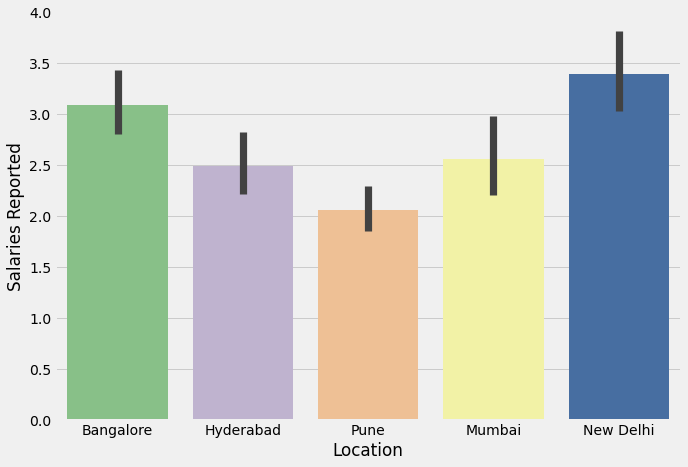

In [95]:
# bar plot for Location vs Salaries reported 

plt.figure(figsize = (10, 7))
sns.barplot(x =df["Location"], y = df["Salaries Reported"], palette = "Accent");



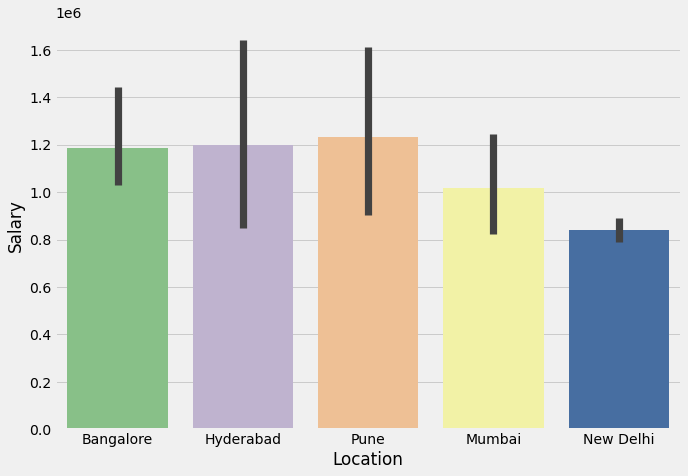

In [96]:
# bar plot for location vs Salary#

plt.figure(figsize = (10, 7))
sns.barplot(x =df["Location"], y = df["Salary"], palette = "Accent");

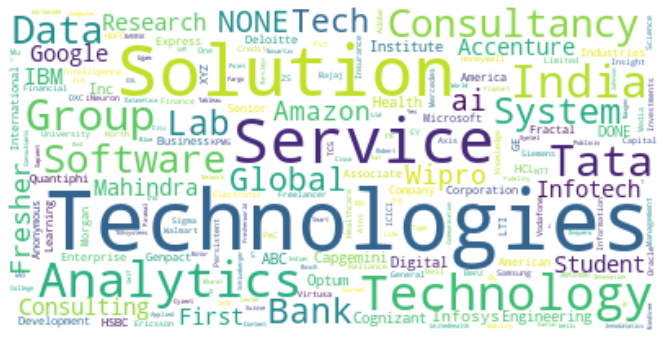

In [46]:
# word Cloud on company Name #

text = " ".join(Company for Company in df["Company Name"]) # Adding Text to a Variable #
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
#  collocations = False, which will ignore the collocation words from the Text #
#  background_color = ‘White’, which will make the words look clearer #
#  we will give the text variable as an argument to .generate() #
plt.figure(figsize = (20, 6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")  #Plotting the image with axis off as we don’t want axis ticks in our image.#
plt.show()

In [ ]:
# plot for Company vs Salary #


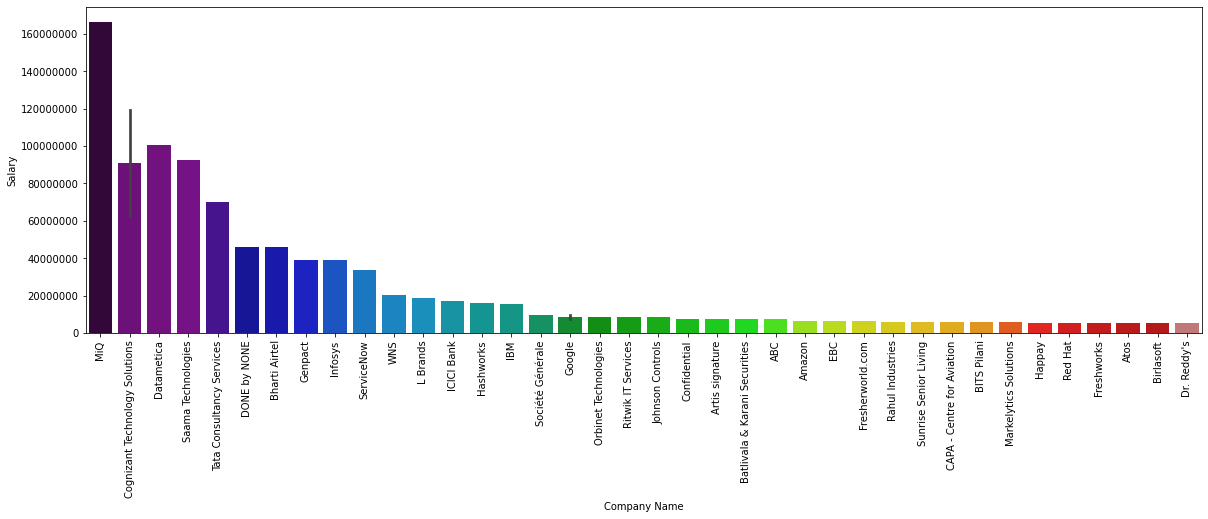

In [53]:
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)  # the labels on the x-axis will rotate 90 #
plt.ticklabel_format(style = 'plain')  # it is used to suppress scientific notation on logarithmic axis#
df.sort_values("Salary", axis = 0, ascending = False, inplace = True) # it will sort values in descending order #
sns.barplot(x = df["Company Name"][:40], y = df["Salary"][:40], palette = "nipy_spectral");

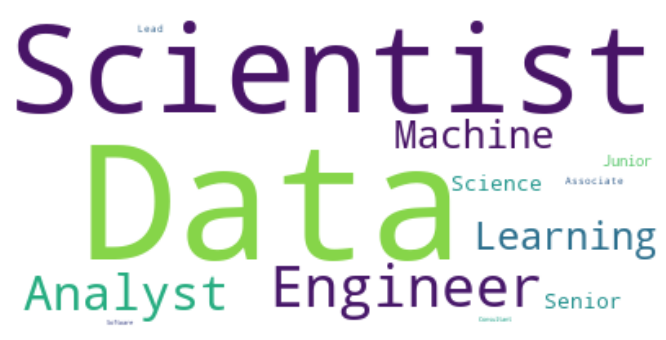

In [55]:
# Word Cloud on Company Name #
text = " ".join(Company for Company in df["Job Title"]) # Adding Text to a Variable #
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
#  collocations = False, which will ignore the collocation words from the Text #
#  background_color = ‘White’, which will make the words look clearer #
#  we will give the text variable as an argument to .generate() #
plt.figure(figsize = (20, 6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")  #Plotting the image with axis off as we don’t want axis ticks in our image.#
plt.show()


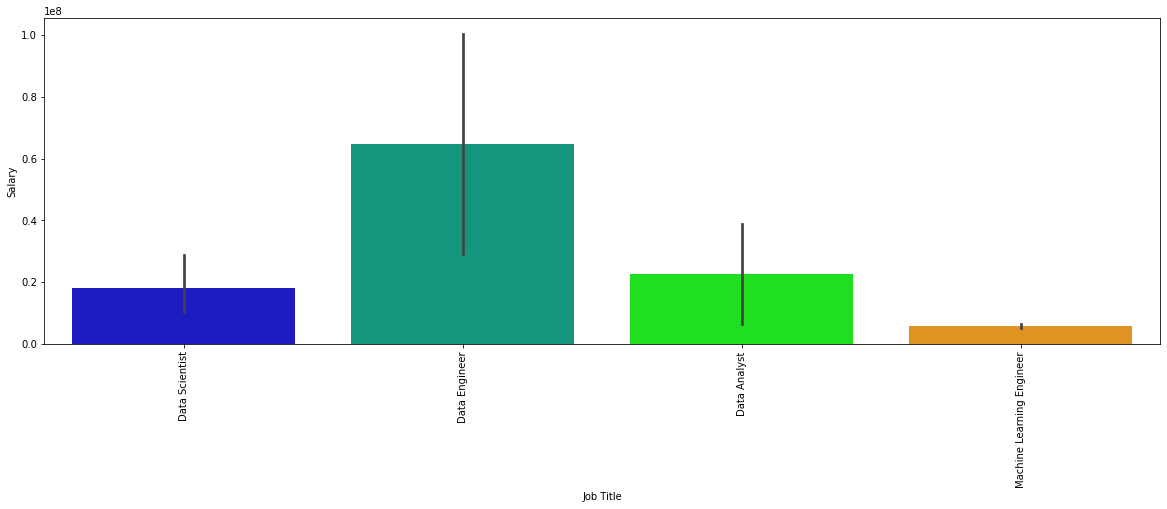

In [75]:
# plot for salary vs JOb Title in which best four role which are frequently high salary in almost each company #
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)  # the labels on the x-axis will rotate 90 #

df.sort_values("Salary", axis = 0, ascending = False, inplace = True) # it will sort values in descending order #
sns.barplot(x = df["Job Title"][:50], y = df["Salary"][:50], palette = "nipy_spectral");

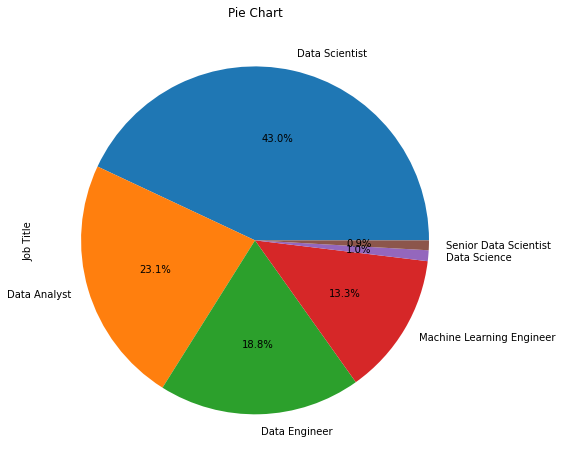

In [68]:
# pie chart for Job titles #
df["Job Title"].value_counts()[:6].plot.pie(figsize = (8, 8), autopct = '%1.1f%%')
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()


In [71]:
df['Company Name'].value_counts()[:30]

Tata Consultancy Services         41
Amazon                            31
Accenture                         30
Google                            27
IBM                               26
Fresher                           26
First Student                     25
Infosys                           23
DONE by NONE                      21
Cognizant Technology Solutions    21
ABC                               20
Wipro                             17
Microsoft                         17
Capgemini                         17
Tech Mahindra                     16
Deloitte                          16
LTI                               16
Nones                             15
HCL Technologies                  14
Quantiphi                         14
Fractal                           14
Wipro Technologies                14
Genpact                           13
Optum                             12
Freelancer                        11
DXC Technology                    10
PwC                               10
H

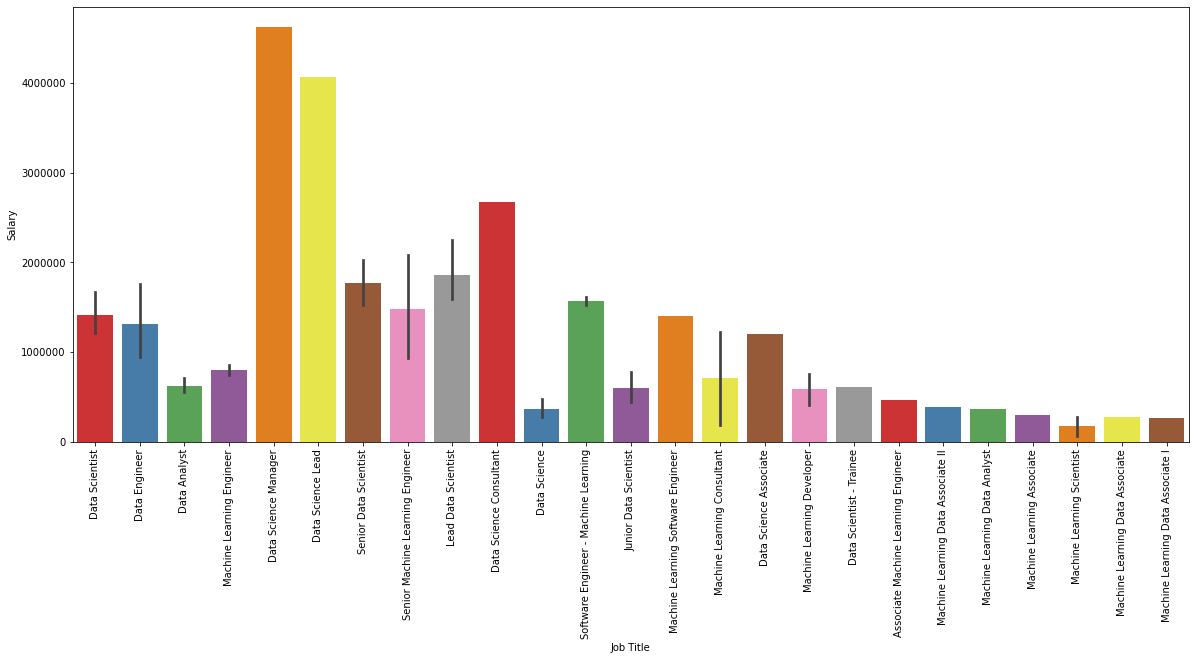

In [78]:
# Bar Plot for Salary vs Job Title #
plt.figure(figsize = (20, 8))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(y = df["Salary"], x = df["Job Title"], palette = "Set1");


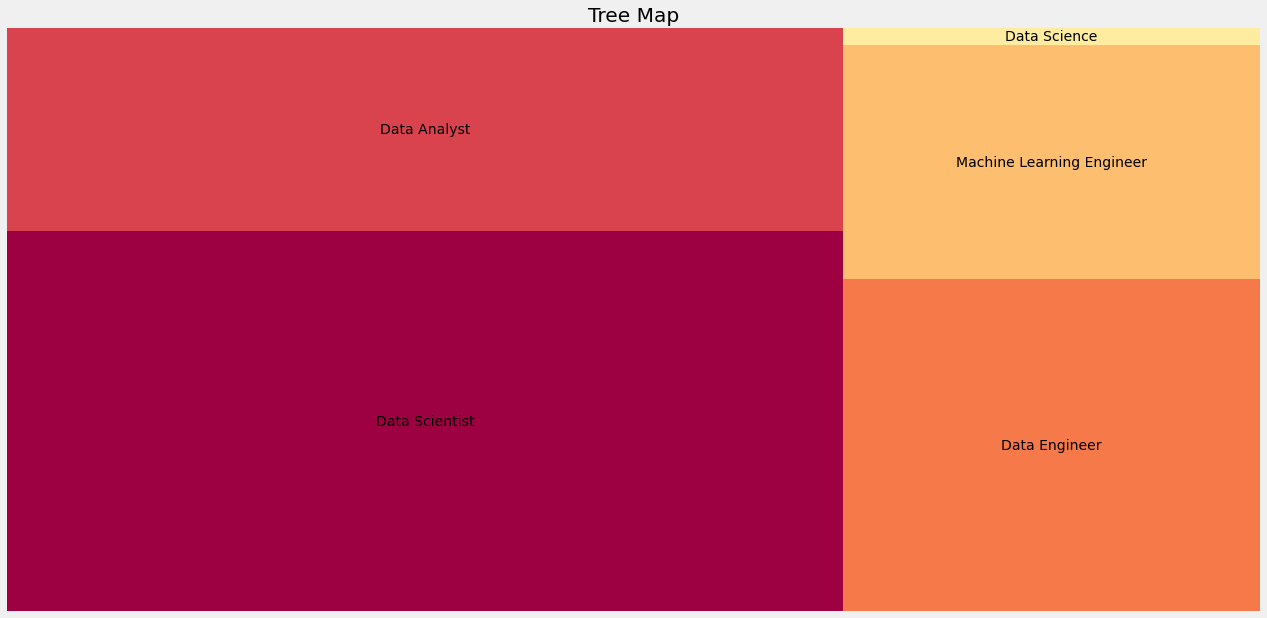

In [93]:
# Top 5 JOb Titles on Tree Map #

x = df["Job Title"].value_counts()[:5]
plt.rcParams["figure.figsize"] = (20, 10)
plt.style.use("fivethirtyeight")
color = plt.cm.Spectral(np.linspace(0, 1, 10))
squarify.plot(sizes = x.values, label = x.index, alpha = 1, color = color)
plt.title("Tree Map")
plt.axis("off")
plt.show()




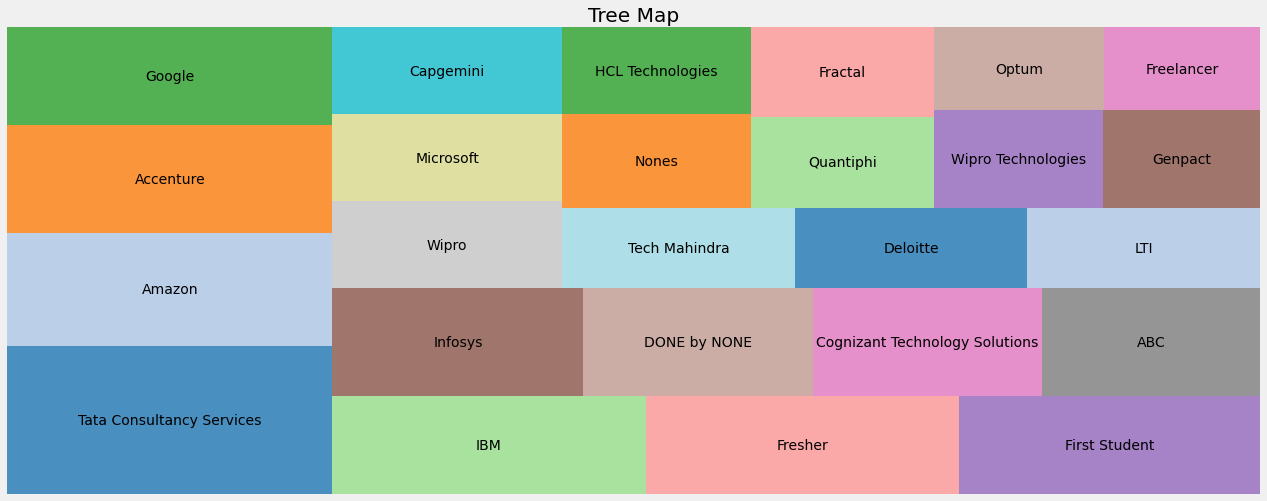

In [94]:
# TOP 25 COMPANY NAMES ON THE TREE MAP #

x = df["Company Name"].value_counts()[:25]
plt.rcParams["figure.figsize"] = (20, 8)
plt.style.use("fivethirtyeight")
color = plt.cm.tab20(np.linspace(0, 1, 15))
squarify.plot(sizes = x.values, label = x.index, alpha = 0.8, color = color)
plt.title("Tree Map")
plt.axis("off")
plt.show()